In [ ]:
# necessary imports

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

import re

import nltk
nltk.download('stopwords')
from nltk.stem.porter import PorterStemmer
from nltk.corpus import stopwords

plt.style.use('Solarize_Light2')
%matplotlib inline


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
df = pd.read_csv('/content/train.csv') # loading data

In [ ]:
df.head() # looking at first five rows of the data

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [ ]:
df.shape # shape of data

(20800, 5)

In [ ]:
df.isnull().sum() # checking for null values in data


,0
id,0
title,558
author,1957
text,39
label,0


In [ ]:
# dropping missing values

df.dropna(inplace = True)

In [ ]:
df.isna().sum()


,0
id,0
title,0
author,0
text,0
label,0


In [ ]:
df.shape


(18285, 5)

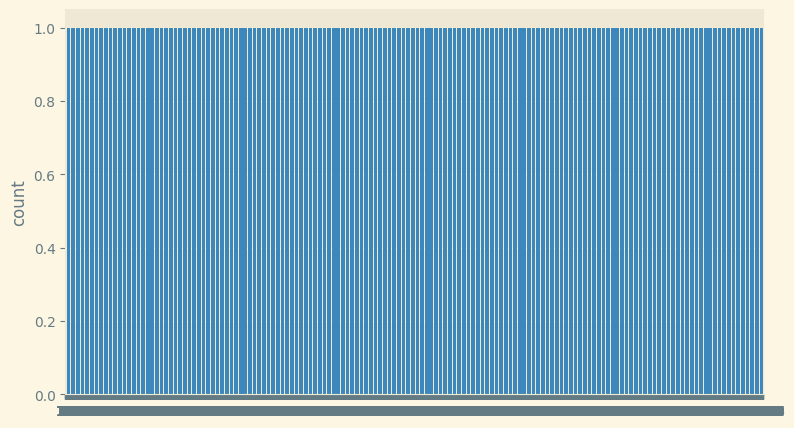

In [ ]:
# checking distribution of data to see if there is any imbalancing present in the data.

plt.figure(figsize = (9, 5))
sns.countplot(df['label'])

plt.show()

In [ ]:
df.dtypes # looking at data types of data


,0
id,int64
title,object
author,object
text,object
label,int64


In [ ]:
df['label'] = df['label'].astype(str)


In [ ]:
df.dtypes


,0
id,int64
title,object
author,object
text,object
label,object


In [ ]:
df.head(10)


,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1
5,5,Jackie Mason: Hollywood Would Love Trump if He...,Daniel Nussbaum,"In these trying times, Jackie Mason is the Voi...",0
7,7,Benoît Hamon Wins French Socialist Party’s Pre...,Alissa J. Rubin,"PARIS — France chose an idealistic, traditi...",0
9,9,"A Back-Channel Plan for Ukraine and Russia, Co...",Megan Twohey and Scott Shane,A week before Michael T. Flynn resigned as nat...,0
10,10,Obama’s Organizing for Action Partners with So...,Aaron Klein,"Organizing for Action, the activist group that...",0
11,11,"BBC Comedy Sketch ""Real Housewives of ISIS"" Ca...",Chris Tomlinson,The BBC produced spoof on the “Real Housewives...,0


In [ ]:
df.reset_index(inplace = True) # resetting the index of data


In [ ]:
df.head(10)


,index,id,title,author,text,label
0,0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1
5,5,5,Jackie Mason: Hollywood Would Love Trump if He...,Daniel Nussbaum,"In these trying times, Jackie Mason is the Voi...",0
6,7,7,Benoît Hamon Wins French Socialist Party’s Pre...,Alissa J. Rubin,"PARIS — France chose an idealistic, traditi...",0
7,9,9,"A Back-Channel Plan for Ukraine and Russia, Co...",Megan Twohey and Scott Shane,A week before Michael T. Flynn resigned as nat...,0
8,10,10,Obama’s Organizing for Action Partners with So...,Aaron Klein,"Organizing for Action, the activist group that...",0
9,11,11,"BBC Comedy Sketch ""Real Housewives of ISIS"" Ca...",Chris Tomlinson,The BBC produced spoof on the “Real Housewives...,0


In [ ]:
df.drop(['index','id'],axis=1,inplace=True) # dropping 'index' and 'id' columns


In [ ]:
ps = PorterStemmer() # initializing porter stemmer


In [ ]:
corpus=[]
sentences=[]
for i in range(0,len(df)):
    review=re.sub('[^a-zA-Z]',' ', df['title'][i])
    review=review.lower()
    list=review.split()
    review=[ps.stem(word) for word in list if word not in set(stopwords.words('english'))]
    sentences=' '.join(review)
    corpus.append(sentences)

In [ ]:
corpus[0]


'hous dem aid even see comey letter jason chaffetz tweet'

In [ ]:
corpus[:20]


['hous dem aid even see comey letter jason chaffetz tweet',
 'flynn hillari clinton big woman campu breitbart',
 'truth might get fire',
 'civilian kill singl us airstrik identifi',
 'iranian woman jail fiction unpublish stori woman stone death adulteri',
 'jacki mason hollywood would love trump bomb north korea lack tran bathroom exclus video breitbart',
 'beno hamon win french socialist parti presidenti nomin new york time',
 'back channel plan ukrain russia courtesi trump associ new york time',
 'obama organ action partner soro link indivis disrupt trump agenda',
 'bbc comedi sketch real housew isi caus outrag',
 'russian research discov secret nazi militari base treasur hunter arctic photo',
 'us offici see link trump russia',
 'ye paid govern troll social media blog forum websit',
 'major leagu soccer argentin find home success new york time',
 'well fargo chief abruptli step new york time',
 'anonym donor pay million releas everyon arrest dakota access pipelin',
 'fbi close hilla

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(max_features = 5000, ngram_range = (1, 3))

In [ ]:
# splitting dataset into features and label

X = cv.fit_transform(corpus).toarray()
y = df['label']

In [ ]:
X, y


(array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]]),
 0        1
 1        0
 2        1
 3        1
 4        1
         ..
 18280    0
 18281    0
 18282    0
 18283    1
 18284    1
 Name: label, Length: 18285, dtype: object)

In [ ]:
X.shape, y.shape


((18285, 5000), (18285,))

In [ ]:
cv.get_feature_names_out()[0:20]


array(['abandon', 'abc', 'abc news', 'abduct', 'abe', 'abedin', 'abl',
       'abort', 'abroad', 'absolut', 'abstain', 'absurd', 'abus',
       'abus new', 'abus new york', 'academi', 'accept', 'access',
       'access pipelin', 'access pipelin protest'], dtype=object)

In [ ]:
# splitting dataset into train data and test data

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

In [ ]:
from sklearn.naive_bayes import MultinomialNB

classifier = MultinomialNB()
classifier.fit(X_train, y_train)

MultinomialNB()

In [ ]:
y_pred = classifier.predict(X_test)
y_pred

array(['0', '0', '1', ..., '1', '0', '1'], dtype='<U1')

In [ ]:
from sklearn import metrics

metrics.accuracy_score(y_test, y_pred)

0.9070428696412949

In [ ]:
# confusion matrix function

def plot_confusion_matrix(cm):
    plt.imshow(cm,interpolation='nearest',cmap=plt.cm.Blues)
    plt.colorbar()
    plt.title('Confusion Matrix')
    labels=['positive','negative']
    tick_marks=np.arange(len(labels))
    plt.xticks(tick_marks,labels)
    plt.yticks(tick_marks,labels)

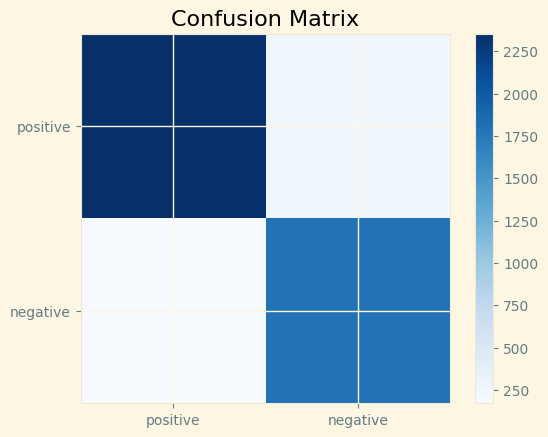

In [ ]:
cm = metrics.confusion_matrix(y_test, y_pred)
plot_confusion_matrix(cm)

In [ ]:
from sklearn.linear_model import PassiveAggressiveClassifier

linear_clf = PassiveAggressiveClassifier()
linear_clf.fit(X_train, y_train)

PassiveAggressiveClassifier()

In [ ]:
y_pred = linear_clf.predict(X_test)


In [ ]:
y_pred = linear_clf.predict(X_test)


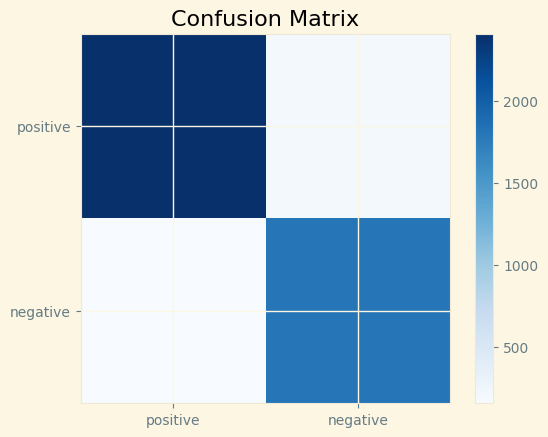

In [ ]:
cm2 = metrics.confusion_matrix(y_test,y_pred)
plot_confusion_matrix(cm2)


In [ ]:
# Extract feature names using the updated method
feature_names = cv.get_feature_names_out()

# Get the log probabilities of features for each class
class_log_prob = classifier.feature_log_prob_

# Since there might be multiple classes, choose one class (e.g., class 0) or analyze for all
class_index = 0  # You can change this to analyze a different class
sorted_features = sorted(zip(class_log_prob[class_index], feature_names), reverse=True)[0:20]

# Display the top 20 features
for log_prob, feature in sorted_features:
    print(f"{feature}: {log_prob}")


new: -2.9370836803525737
time: -2.989501001183797
york: -2.99160537906476
new york: -2.991816060620369
york time: -3.0090303843346344
new york time: -3.0090303843346344
breitbart: -3.965228024010945
trump: -4.001575011932787
donald: -5.268609374533488
donald trump: -5.274788590899446
say: -5.829252383925441
clinton: -6.014455787094285
obama: -6.031923480134675
attack: -6.194183308711192
state: -6.1993781255882965
report: -6.209849425455592
presid: -6.220431534786129
brief: -6.236517672537754
hous: -6.332909518212819
hillari: -6.3388796851993225


In [ ]:
# Extract feature names using the updated method
feature_names = cv.get_feature_names_out()

# Get the log probabilities of features for each class
class_log_prob = classifier.feature_log_prob_

# For class 0 (e.g., "Fake News"), extract the bottom 20 features
class_index = 0  # 0 corresponds to the first class (e.g., "Fake")
sorted_features = sorted(zip(class_log_prob[class_index], feature_names))[:20]

# Display the bottom 20 features
print("Bottom 20 features for class 0 (Fake News):")
for log_prob, feature in sorted_features:
    print(f"{feature}: {log_prob}")


Bottom 20 features for class 0 (Fake News):
access pipelin protest: -11.456873497616078
acknowledg emf: -11.456873497616078
acknowledg emf damag: -11.456873497616078
acquit: -11.456873497616078
adhd: -11.456873497616078
airstrik kill: -11.456873497616078
al nusra: -11.456873497616078
american concern: -11.456873497616078
american concern elect: -11.456873497616078
american peopl: -11.456873497616078
american peopl defeat: -11.456873497616078
appar: -11.456873497616078
arabian: -11.456873497616078
ariel noyola: -11.456873497616078
ariel noyola rodr: -11.456873497616078
ask question: -11.456873497616078
auf: -11.456873497616078
avail: -11.456873497616078
babi powder: -11.456873497616078
bad news: -11.456873497616078
